# Step 1 : Importation of necessary files and Exploratory data Analysis

For this part of the project, i will first 

*Load libraries

*Load the dataset

and then analyse our dataset with basic function in python .head(); .info(); .descibe()




In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV


# laod the dataset
file_path = r"C:\Users\julie\Downloads\Diabetes\Diabetes\diabetes.csv"
df = pd.read_csv(file_path)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Thanks to the call of head() function, we can observe how is our dataset :

Pregnancies: Number of pregnancies.

Glucose

BloodPressure: Diastolic blood pressure 

SkinThickness: Triceps skinfold thickness.

Insulin: 2-Hour serum insulin (mu U/ml).

BMI: Body Mass Index 
    
DiabetesPedigreeFunction: Diabetes pedigree function
    
Age: Age in years.
    
Outcome: Class variable (0 if no diabetic, 1 if diabetic).


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Each column has 768 non null values, indicating there are no missing values in the dataset.

Most columns have the int64 type, except for BMI and DiabetesPedigreeFunction, which are float64.

In [22]:
# Statistics 
print(df.describe())

# Verify mising vlues
print(df.isnull().sum())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

We have now some statistics about our dataset,

For instance : 

**Pregnancies:**

Mean: 3.845

Standard Deviation: 3.370

Range: 0 to 17






*Important things* : For glucose, bloodpressure, skin thickness, insuline BMI, the minimum value of 0 might indicate missing or invalid data.
Overall, the dataset seems to be well-structured but requires handling of 0 values in specific columns to ensure accurate analysis and modeling.

Now, we will plot the distribution of all variables 

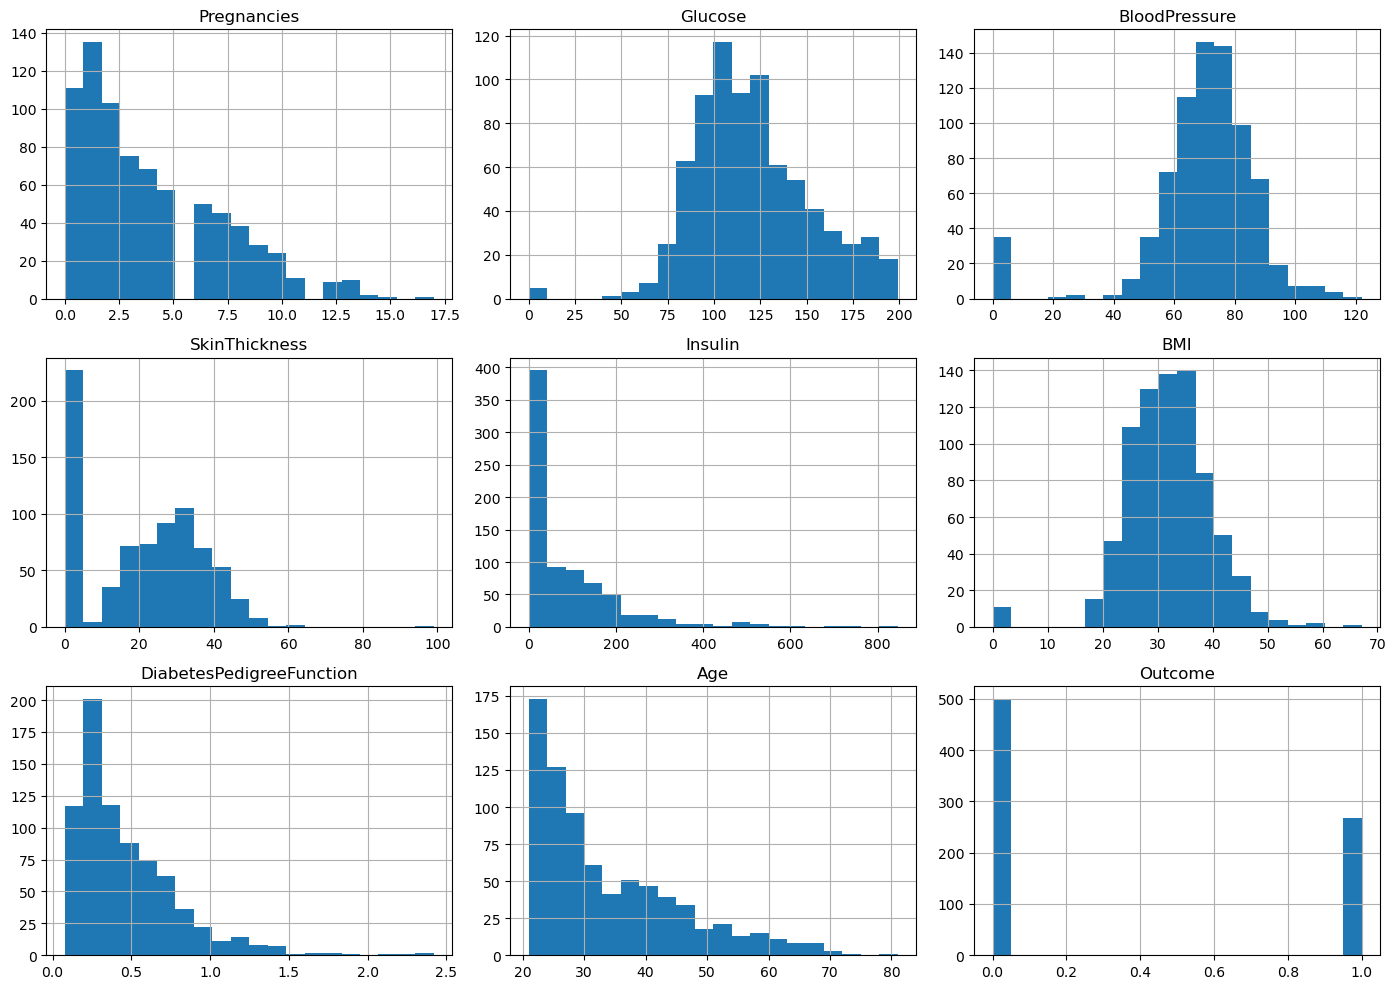

In [23]:
# vairbales distribution
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()


These histograms provide insights into the data distribution and highlight potential issues with zero values in certain columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI) that might need to be addressed as missing data.

Some relevant things : 

**Outcome**

This is a binary distribution.

The dataset contains more non-diabetic (0) than diabetic (1) individuals


**BMI**
The distribution is approximately normal.
    
Most BMI values range from 20 to 50.

There are some instances with a BMI of 0, which may need to be treated as missing data.


Then, we create a correaltion matrix to see the relation between our variables

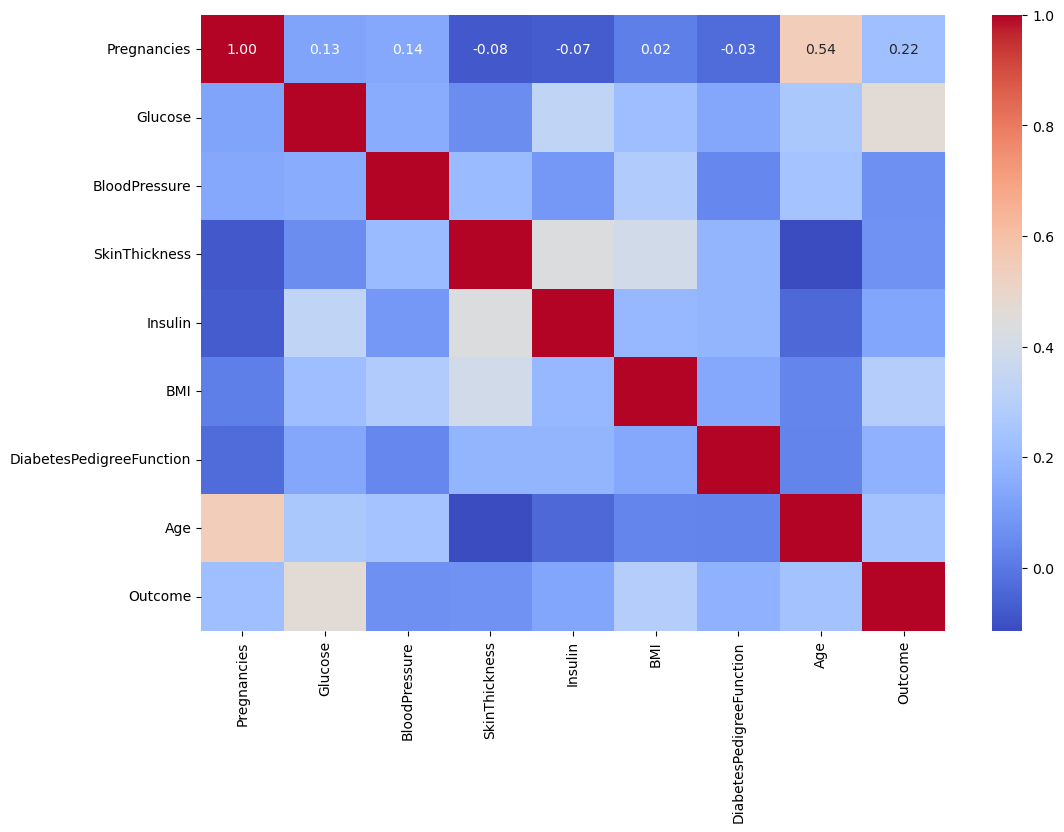

In [24]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



Some key informations

relation with Pregnancies:

    Age (0.54): There is a moderate positive correlation, indicating that older women tend to have more pregnancies.
    Outcome (0.22): There is a low positive correlation with the outcome (diabetes).


relation with Glucose:

    Outcome (0.49): There is a moderate positive correlation with the outcome, suggesting that higher glucose levels are associated with a higher likelihood of diabetes.



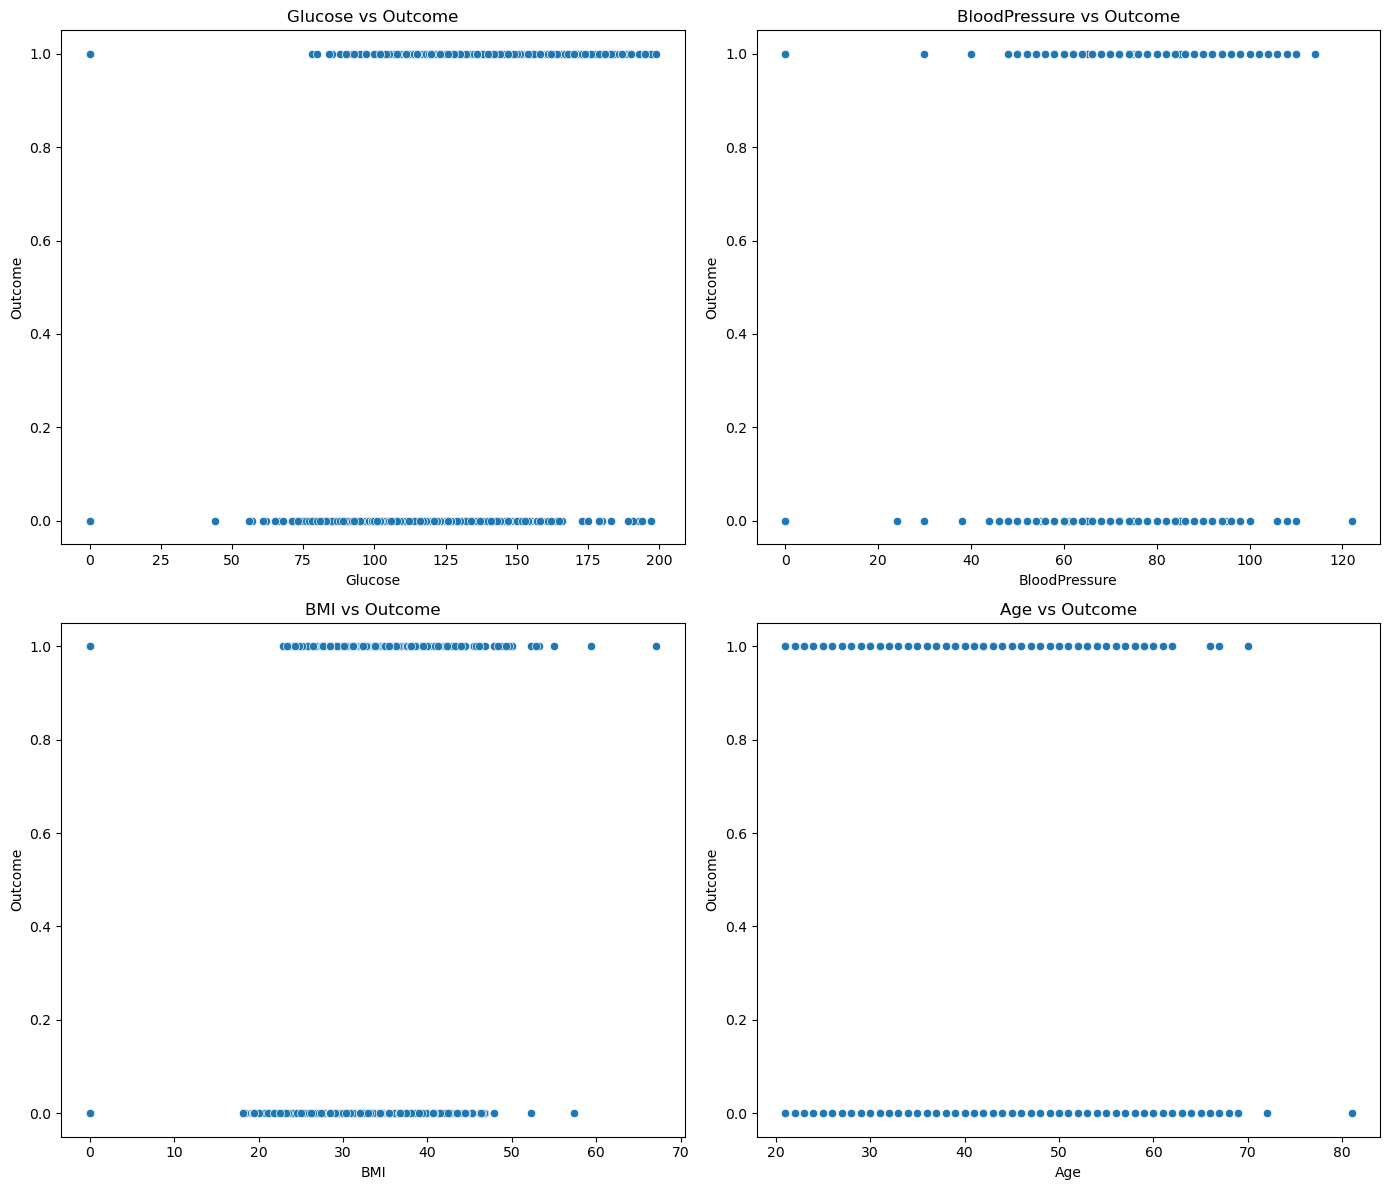

In [25]:

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Glucose vs Outcome
sns.scatterplot(ax=axes[0, 0], x='Glucose', y='Outcome', data=df)
axes[0, 0].set_title('Glucose vs Outcome')

# BloodPressure vs Outcome
sns.scatterplot(ax=axes[0, 1], x='BloodPressure', y='Outcome', data=df)
axes[0, 1].set_title('BloodPressure vs Outcome')

# BMI vs Outcome
sns.scatterplot(ax=axes[1, 0], x='BMI', y='Outcome', data=df)
axes[1, 0].set_title('BMI vs Outcome')

# Age vs Outcome
sns.scatterplot(ax=axes[1, 1], x='Age', y='Outcome', data=df)
axes[1, 1].set_title('Age vs Outcome')

plt.tight_layout()
plt.show()

For instance, we can see that the fact of being diabetic (if outcome= 1) is not linked to the age because there are approximatly as many points (last plot)


On other hand, higher BMI values tend to be associated with diabetic individuals (bmi vs outcome)


Diabetic individuals tend to have higher glucose levels, generally above 120. ( first plot)

# Step 2 : Cleaning 

As i said before : *Important things* : For glucose, bloodpressure, skin thickness, insuline BMI, the minimum value of 0 might indicate missing or invalid data.
Overall, the dataset seems to be well-structured but requires handling of 0 values in specific columns to ensure accurate analysis and modeling.

In this part we will handle  this problem,



To do that we will replace 0 values with the median of each column

In [26]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# we replace 0 values with the median of each column

for column in columns_to_clean:
    median = df[column].median()
    df[column] = df[column].replace(0, median)

# verify what we did
cleaned_data_summary = df.describe()
print(cleaned_data_summary)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  

Now the problem is solved ! 

# Step 3: Split the data into train-test or train-val-test

In [27]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(614, 8) (154, 8) (614,) (154,)



We have split our dataset in train test (20% for test) and the shape of our variables is :


X_train.shape: (614, 8)

X_test.shape: (154, 8)

y_train.shape: (614,)

y_test.shape: (154,)


# Step 4 : Construction and evaluation of our initial model

We can now construct our model and evaluate it

In [28]:

knn = KNeighborsClassifier()


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[67 32]
 [21 34]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        99
           1       0.52      0.62      0.56        55

    accuracy                           0.66       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.66      0.66       154



FOR THE INITIAL MODEL : 

That is our result according to confusion matrix :    

True Positives (TP): 34 (diabetic correctly predicted as diabetic)

False Positives (FP): 32 (no diabetic incorrectly predicted as diabetic)
    
False Negatives (FN): 21 (diabetic incorrectly predicted as non-diabetic)

True Negatives (TN): 67 (no diabetic correctly predicted as non-diabetic)




Thanks to our classification report, we have these information :

Precision: The ability of the classifier to not label a non-diabetic as diabetic.

        Class 0 (non-diabetic): 0.76
        
        Class 1 (diabetic): 0.52
    
Recall: The ability of the classifier to find all the diabetic patients.

        Class 0: 0.68
        Class 1: 0.62
    
F1-Score: The weighted average of precision and recall.

        Class 0: 0.72
        Class 1: 0.56
    
Support: The number of actual occurrences of the class in the test set.

        Class 0: 99
        Class 1: 55

Overall : 

Accuracy: The overall accuracy of the model: 0.66
    



**IN THE NEXT PART, WE WILL TRY TO IMPROVE/OPTIMIZE OUR MODEL by optimizing hyprparameters**

# Step 6 : Optimisation of Hyperparameters

We will use GridSearchCV 
It allows to do a cross-validation to find the best value of n_neighbors based on accuracy

In [32]:

param_grid = {'n_neighbors': range(1, 31)}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


{'n_neighbors': 15}
[[78 21]
 [22 33]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.61      0.60      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154




True Positives (TP): 33 (diabetic correctly predicted as diabetic)
    
False Positives (FP): 21 (non-diabetic incorrectly predicted as diabetic)
    
False Negatives (FN): 22 (diabetic incorrectly predicted as non-diabetic)

True Negatives (TN): 78 (non-diabetic correctly predicted as non-diabetic)




Precision: The ability of the classifier to not label a non-diabetic as diabetic.

    Class 0 (non-diabetic): 0.78
    Class 1 (diabetic): 0.61

Recall: The ability of the classifier to find all the diabetic patients.

    Class 0: 0.79
    Class 1: 0.60

F1-Score: The weighted average of precision and recall.

    Class 0: 0.78
    Class 1: 0.61

Support: The number of actual occurrences of the class in the test set.

    Class 0: 99
    Class 1: 55

Accuracy: The overall accuracy of the model: 0.72








**CONCLUISON**: 

The optimized KNN model achieved an overall accuracy of 72%, an improvement over the initial model's accuracy of 66%.
    
The precision, recall, and f1-score for the diabetic class (1) have also improved, indicating better performance in identifying diabetic individuals.
    
The best number of neighbors (n_neighbors) found by the grid search was within the range specified, leading to a more accurate and balanced model.






<Figure size 800x600 with 0 Axes>

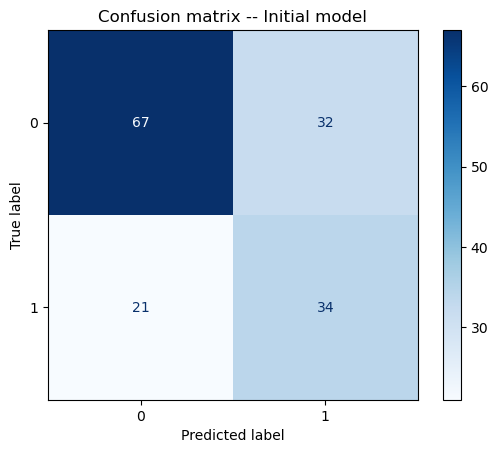

<Figure size 800x600 with 0 Axes>

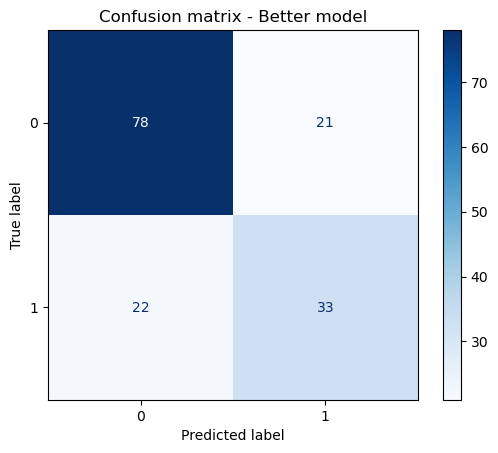

In [30]:

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

# Confusion matrix xfor the initial model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix -- Initial model')
plt.show()

#confusion matrix for the improved model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix - Better model')
plt.show()

It gives a graphic representation of our confusion matrix

Initial Model Confusion Matrix

    True Positives (TP): 34 (diabetic correctly predicted as diabetic)
    False Positives (FP): 32 (non-diabetic incorrectly predicted as diabetic)
    False Negatives (FN): 21 (diabetic incorrectly predicted as non-diabetic)
    True Negatives (TN): 67 (non-diabetic correctly predicted as non-diabetic)

Optimized Model Confusion Matrix

    True Positives (TP): 33 (diabetic correctly predicted as diabetic)
    False Positives (FP): 21 (non-diabetic incorrectly predicted as diabetic)
    False Negatives (FN): 22 (diabetic incorrectly predicted as non-diabetic)
    True Negatives (TN): 78 (non-diabetic correctly predicted as non-diabetic)

We will also plot ROC CURVES TO INTERPRET PERFORMANCE OF OUR INITAL MODEL AND IMPROVED MODLE

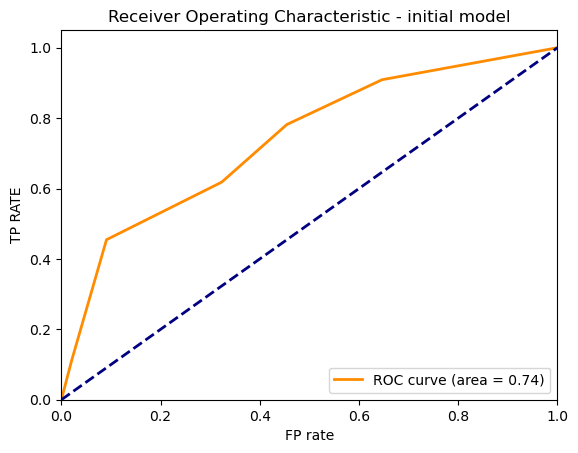

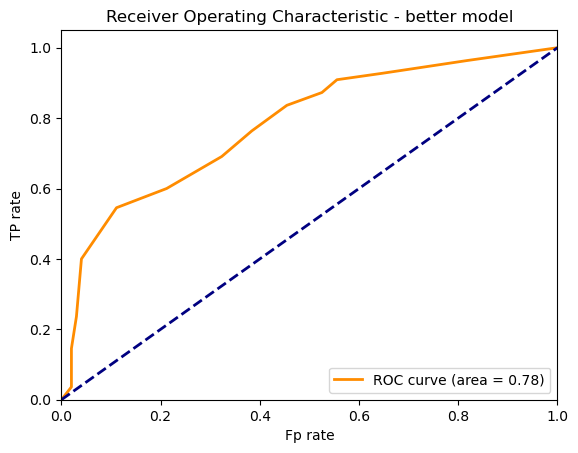

In [31]:
#Roc initial model
y_prob_initial = knn.predict_proba(X_test)[:, 1]
fpr_initial, tpr_initial, _ = roc_curve(y_test, y_prob_initial)
roc_auc_initial = auc(fpr_initial, tpr_initial)

plt.figure()
plt.plot(fpr_initial, tpr_initial, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_initial)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP rate')
plt.ylabel('TP RATE')
plt.title('Receiver Operating Characteristic - initial model')
plt.legend(loc="lower right")
plt.show()

# ROC Improved model
y_prob_best = best_knn.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Fp rate')
plt.ylabel('TP rate')
plt.title('Receiver Operating Characteristic - better model')
plt.legend(loc="lower right")
plt.show()


**Initial Model ROC Curve**

AUC (Area Under the Curve): 0.74

The AUC of 0.74 indicates a fair level of separability between the diabetic and non-diabetic classes.



**Optimized Model ROC Curve**

AUC (Area Under the Curve): 0.78

The AUC of 0.78 indicates an improvement in the model's ability to distinguish between the diabetic and non-diabetic classes.

Summary :     
The optimized model shows a clear improvement in terms of AUC, indicating a better overall performance.
   
The ROC curve for the optimized model demonstrates a better balance between the true positive rate and the false positive rate, resulting in more accurate predictions.

The improvement in the AUC from 0.74 to 0.78 signifies that the hyperparameter optimization has successfully enhanced the model's predictive capability.